In [1]:
# imports
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 
import csv 

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Get COSMOS 2020 Data

In [3]:
##### Get data from catalog file

# open COSMOS master file and get data 
inf = fits.open(path_cat+'\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data = inf[1].data
# cols = inf[1].columns
# head = inf[0].header
inf.close()

# NOTE: Only run this once! It gets stuck if you try to run this again. 
#       If it gets stuck, interrupt and restart the jupyter kernel then run again. 

In [4]:
##### Get data from columns and print info 

# get IRAC data (unit = 'uJy')
ch1_data  = np.array(data['SPLASH_CH1_FLUX']) # 3.5686 um
ch2_data  = np.array(data['SPLASH_CH2_FLUX']) # 4.5067 um
ch3_data  = np.array(data['SPLASH_CH3_FLUX']) # 5.7788 um
ch4_data  = np.array(data['SPLASH_CH4_FLUX']) # 7.9958 um 

# get IDs
id_data   = np.array(data['ID'])
id15_data = np.array(data['ID_COSMOS2015'])

# get redshift 
z_data    = np.array(data['lp_zBEST'])


In [5]:
##### print info
print('Col \t\t Min \t\t Max \t\t Count')
print('-------------------------------------------------------------')
print('CH1 \t\t',       min(ch1_data), '\t',   max(ch1_data), '\t',    len(ch1_data))
print('CH2 \t\t',       min(ch2_data), '\t',   max(ch2_data), '\t',    len(ch2_data))
print('CH3 \t\t',       min(ch3_data), '\t\t', max(ch3_data), '\t',    len(ch3_data))
print('CH4 \t\t',       min(ch4_data), '\t\t', max(ch4_data), '\t',    len(ch4_data))
print('ID  \t\t',       min(id_data),  '\t\t', max(id_data),  '\t',    len(id_data))
print('ID 2015 \t',     min(id15_data),'\t\t', max(id15_data),'\t',    len(id15_data))
print('z  \t\t',        min(z_data),   '\t\t', max(z_data),   '\t\t',  len(z_data))

Col 		 Min 		 Max 		 Count
-------------------------------------------------------------
CH1 		 -373.86588 	 11499.407 	 1720700
CH2 		 -200.00957 	 12870.739 	 1720700
CH3 		 -99.9 		 17447.684 	 1720700
CH4 		 -99.9 		 15091.21 	 1720700
ID  		 1 		 1720700 	 1720700
ID 2015 	 -99 		 1182096 	 1720700
z  		 -99.0 		 99.9 		 1720700


In [6]:
##### Filter out bad data from the columns and print info 

# boolean array, true when data is valid and false otherwise
irac_good = (ch1_data > 0) & (ch2_data > 0) & (ch3_data > 0) & (ch4_data > 0)
z_good    = (z_data != -99) & (z_data != 99.9)

# final selection 
all_good  = irac_good & z_good

# filter data
ch1_data_good  = ch1_data[all_good]
ch2_data_good  = ch2_data[all_good]
ch3_data_good  = ch3_data[all_good]
ch4_data_good  = ch4_data[all_good]
id_data_good   = id_data[all_good]
id15_data_good = id15_data[all_good]
z_data_good    = z_data[all_good]


In [7]:
###### info
print('Col \t\t Min \t\t Max \t\t Count')
print('----------------------------------------------------')
print('CH1 \t\t',       min(ch1_data_good), '\t',   max(ch1_data_good), '\t', len(ch1_data_good))
print('CH2 \t\t',       min(ch2_data_good), '\t',   max(ch2_data_good), '\t', len(ch2_data_good))
print('CH3 \t\t',       min(ch3_data_good), '\t',   max(ch3_data_good), '\t', len(ch3_data_good))
print('CH4 \t\t',       min(ch4_data_good), '\t',   max(ch4_data_good), '\t', len(ch4_data_good))
print('ID  \t\t',       min(id_data_good),  '\t',   max(id_data_good),  '\t', len(id_data_good))
print('ID 2015 \t',     min(id15_data_good),'\t',   max(id15_data_good),'\t', len(id15_data_good))
print('z   \t\t',       min(z_data_good),   '\t\t', max(z_data_good),   '\t', len(z_data_good))

Col 		 Min 		 Max 		 Count
----------------------------------------------------
CH1 		 0.023648646 	 1287.5731 	 50500
CH2 		 0.0023715238 	 1051.9921 	 50500
CH3 		 0.002538407 	 2789.9287 	 50500
CH4 		 0.00084613566 	 5239.906 	 50500
ID  		 202353 	 1469985 	 50500
ID 2015 	 210955 	 997077 	 50500
z   		 0.0 		 6.5032 	 50500


# IR AGN Selection (Donley et al., 2012) 

x = log10 ( f5.8 μm / f3.6 μm ), 
y = log10 ( f8.0 μm / f4.5 μm ) 

x >= 0.08 AND 
y >= 0.15 AND
y >= (1.21 x) − 0.27 AND
y <= (1.21 x) + 0.27 AND
f4.5 μm > f3.6 μm AND
f5.8 μm > f4.5 μm AND
f8.0 μm > f5.8 μm

In [8]:
##### Draw the selection wedge for Donley 2012 on a plot 

def PlotDonleyWedge() : 
    # constants
    x_min = 0.08    # x >= 0.08
    y_min = 0.15    # y >= 0.15
    max = 10        # arbritrary 

    # calculate intercepts
    x_int_ymin = (y_min + 0.27)/1.21  # intercept between y_min and (y>=1.21x-0.27)
    y_int_xmin = (1.21*x_min) + 0.27  # intercept between x_min and (y>=1.21x+0.27)

    # calculate y_low intercepts (y>=1.21x-0.27)
    y1_low = (1.21*x_int_ymin)  - 0.27   
    y2_low = (1.21*max)         - 0.27

    # calculate y_high intercepts (y>=1.21x+0.27)
    y1_high = (1.21*x_min)      + 0.27
    y2_high = (1.21*max)        + 0.27

    # plot lines between intercepts 
    plt.plot( [x_min,       x_min],         [y_min,     y_int_xmin], 'k' )    # x >= 0.08
    plt.plot( [x_min,       x_int_ymin],    [y_min,     y_min],      'k' )    # y >= 0.15
    plt.plot( [x_int_ymin,  max],           [y1_low,    y2_low],     'k' )    # y >= 1.21x - 0.27
    plt.plot( [x_min,       max],           [y1_high,   y2_high],    'k' )    # y <= 1.21x + 0.27

    # name the x and y axis 
    plt.xlabel('$\log(f_{5.8um}/f_{3.6um})$') 
    plt.ylabel('$\log(f_{8.0um}/f_{4.5um})$') 

In [9]:
##### redefine the defaults for plots

# settings 
mpl.rcParams['figure.figsize']  = 6, 4  # figure size in inches
mpl.rcParams['axes.titlesize']  = 16    # size of title
mpl.rcParams['axes.titlepad']   = 16    # space between title and plot 
mpl.rcParams['axes.labelsize']  = 14    # font size of the x and y labels
mpl.rcParams['lines.linewidth'] = 0.5   # line width in points

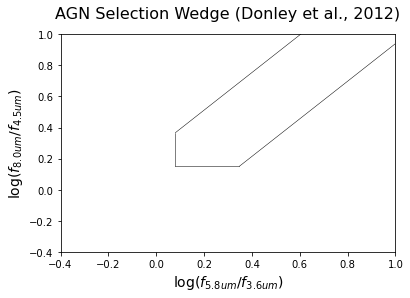

In [10]:
##### draw the Donley Wedge on a plot as a test 

# plot 
PlotDonleyWedge()
plt.axis([-0.4,1,-0.4,1]) 
plt.title('AGN Selection Wedge (Donley et al., 2012)') 
plt.show()

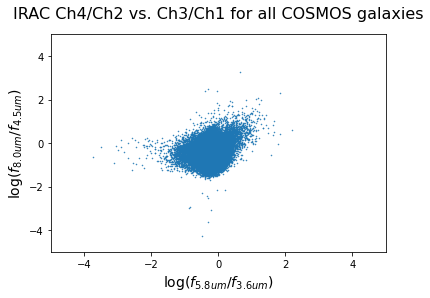

Galaxy count:  50500


In [11]:
##### plot all the galaxies with IRAC data

# calculate colors for each galaxy
x = np.log10( ch3_data_good / ch1_data_good ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( ch4_data_good / ch2_data_good ) # y = log10 ( f_8.0um / f_4.5 um )

# plot 
plt.plot(x, y, 'o', markersize=0.5)
plt.axis([-5,5,-5,5]) 
plt.title('IRAC Ch4/Ch2 vs. Ch3/Ch1 for all COSMOS galaxies') 
plt.xlabel(r'$\log(f_{5.8um}/f_{3.6um})$') 
plt.ylabel(r'$\log(f_{8.0um}/f_{4.5um})$')
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x))

In [16]:
##### Get the galaxies within the Donley selection wedge

# initialize empty lists
x_agn    = []
y_agn    = []
z_agn    = []
id_agn   = []
id15_agn = [] 

# look through each galaxy and check if it is inside the selection box
for i in range(len(x)):
    # if the point is an agn...
    if(x[i]>=0.08 and y[i]>=0.15 and y[i]>=(1.21*x[i]-0.27) and y[i]<=(1.21*x[i]+0.27)) :  
        # ... add values to respective list 
        x_agn.append(x[i])
        y_agn.append(y[i])
        z_agn.append(z_data_good[i])
        id_agn.append(id_data_good[i])
        id15_agn.append(id15_data_good[i])
    # else, move to next point

# confirm that sizes match
sizeRef = len(x_agn)
if( sizeRef == len(y_agn) and sizeRef == len(id_agn) and sizeRef == len(id15_agn) and sizeRef == len(z_agn)) :
    print("All lists are the same length")
else :
    print("ERR: all lists are NOT the same length")

# convert lists to arrays as needed
z_agn_arr = np.array(z_agn)


All lists are the same length


In [13]:
##### Save id list to a *.csv file 

# open file 
with open(path_csv+'\COSMOS2020_DONLEY2012_AGN.csv', mode='w', newline='') as csv_file:
    # initialize csv
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    # write header
    writer.writerow(['This file contains the IDs of Donley et al 2012 selected AGN from the COSMOS 2020 catalog. These lists were generated in COSMOS20_AGN_selection.ipynb. Line 1 is the ID, Line 2 is the ID_COSMOS2015.'])
    # write agn id list to file 
    writer.writerow(id_agn)
    writer.writerow(id15_agn)

# confirm 
print('List saved: COSMOS2020_DONLEY2012_AGN.csv')


List saved: COSMOS2020_DONLEY2012_AGN.csv


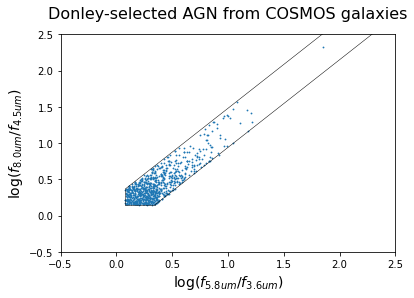

Galaxy count:  799


In [14]:
##### Plot Donley selected AGN in the wedge 

# plot agn in selection box 
plt.plot(x_agn, y_agn, 'o', markersize=0.8)
PlotDonleyWedge()
plt.axis([-0.5,2.5,-0.5,2.5]) 
plt.title('Donley-selected AGN from COSMOS galaxies') 
plt.savefig(path_fig+'\DonleySelectedAGN.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')
plt.show()

# print number of galaxies
print('Galaxy count: ', len(x_agn))

# Properties of IR AGN Selection

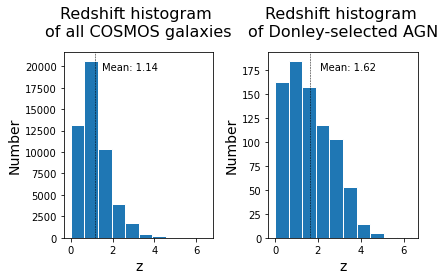

In [15]:
##### Plot the histograms of the redshifts of the Donley selected AGN 

# subplots 
fig, (z_hist, z_hist_agn) = plt.subplots(1,2)

## z_hist subplot

# plot all redshift histogram
z_hist.hist(z_data_good, edgecolor='w')

# axis and titles 
z_hist.set_title('Redshift histogram \nof all COSMOS galaxies')
z_hist.set_xlabel('z')
z_hist.set_ylabel('Number')

# mean 
mean_all = z_data_good.mean()
min_ylim_all, max_ylim_all = z_hist.get_ylim()
z_hist.axvline(mean_all, color='k',linestyle='dashed')
z_hist.text(mean_all*1.3, max_ylim_all*0.9, 'Mean: {:.2f}'.format(mean_all))

## z_hist_agn subplot

# plot agn redshift histogram
z_hist_agn.hist(z_agn_arr,edgecolor='w')

# axis and titles 
z_hist_agn.set_title('Redshift histogram \nof Donley-selected AGN')
z_hist_agn.set_xlabel('z')
z_hist_agn.set_ylabel('Number')

# mean 
mean_agn = z_agn_arr.mean()
min_ylim_agn, max_ylim_agn = z_hist_agn.get_ylim()
z_hist_agn.axvline(mean_agn, color='k',linestyle='dashed')
z_hist_agn.text(mean_agn*1.3, max_ylim_agn*0.9, 'Mean: {:.2f}'.format(mean_agn))

## end subplots 

# formatting and save  
plt.tight_layout()
plt.savefig(path_fig+'\RedshiftHistogram.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')


# Next Steps
1. explore parameters of ir selected (redshifts distribution histogram (col=lp_zBEST)) (SED properties/luminositied later) --> do this before meeting w/ Dave tomorrow
2. given x-ray catalog from paper --> Marchesi/Chandra catalog 2016 --> fits table 
3. match x-ray sources from Marchei to COSMOS 2020 catalog using ID 
4. plot x-ray and ir selected agn on same plot
5. Later: Get Lx_* flux columns from Xray selecgted AGN distributions


* start taking ntoes for paper, get started by end of week
